# Building a Simple NLP Spam Dectector

## 1.0 Loading our Data

In [74]:
import numpy as np
import pandas as pd

file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/spam.csv"
data = pd.read_csv(file_name, encoding = "latin-1")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Let's rename our columns to something a bit more interpretable and extract only the columns we need

In [75]:
data = data[['v1', 'v2']]
data = data.rename(columns = {'v1': 'label', 'v2': 'text'})
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [76]:
data.shape

(5572, 2)

In [77]:
data.label.unique()

array(['ham', 'spam'], dtype=object)

In [78]:
# percentage of missing values in each column
round(100 * (data.isnull().sum()/len(data)),2).sort_values(ascending=False)

text     0.0
label    0.0
dtype: float64

In [79]:
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [80]:
data[data[['label', 'text']].duplicated() == True]

,label,text
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [81]:
data = data.drop_duplicates()

In [82]:
# Sanity Check to make sure it worked
data[data[['label', 'text']].duplicated() == True]

,label,text


In [83]:
data.shape

(5169, 2)

#### Simple plot of out class label counts

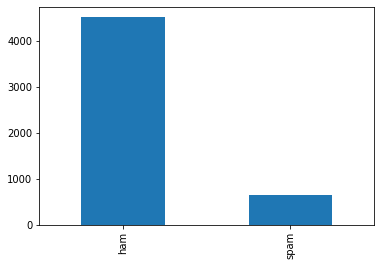

In [84]:
data.label.value_counts().plot(kind="bar")

# 2. Building our Spam/Ham Classifer

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

def review_messages(msg):
    # converting messages to lowercase
    msg = msg.lower()
    return msg

In [98]:
# Processing text messages
data['text'] = data['text'].apply(review_messages)

In [99]:
# Inspect the changes on our data
data

,label,text
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...
5568,ham,will ì_ b going to esplanade fr home?
5569,ham,"pity, * was in mood for that. so...any other s..."
5570,ham,the guy did some bitching but i acted like i'd...


### Preparing our data

In [ ]:
# train test split 
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size = 0.1, random_state = 1)

In [93]:
# training vectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)

![](https://miro.medium.com/max/3604/0*56JnM18OAx1lhIQb.png)

### Training our model

In [100]:
# training the classifier 
svm = svm.SVC(C=1000)
svm.fit(X_train_vec, y_train)

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [101]:
# testing against testing set 
X_test = vectorizer.transform(X_test)
y_pred = svm.predict(X_test) 

print("We have an accuracy of: " + str(accuracy_score(y_test,y_pred)))
print(confusion_matrix(y_test, y_pred))

We have an accuracy of: 0.9845261121856866
[[462   0]
 [  8  47]]


### Predict where your text is Spam or Ham

In [61]:
# test against new messages 
def pred(msg):
    msg = vectorizer.transform([msg])
    prediction = svm.predict(msg)
    return prediction[0]

In [102]:
for i in range(0, 10):
  rand_index = np.random.randint(0, len(data))
  test_sample = data.iloc[rand_index][1]

  print(test_sample)
  print("Text is - " + str(pred(test_sample)) +"\n")

howz that persons story
Text is - ham

then get some cash together and i'll text jason
Text is - ham

i will come to ur home now
Text is - ham

ìï collecting ur laptop then going to configure da settings izzit?
Text is - ham

the guy at the car shop who was flirting with me got my phone number from the paperwork and called and texted me. i'm nervous because of course now he may have my address. should i call his boss and tell him, knowing this may get him fired?
Text is - ham

no gifts!! you trying to get me to throw myself off a cliff or something?
Text is - ham

who's there say hi to our drugdealer
Text is - ham

shall i send that exe to your mail id.
Text is - ham

mobile club: choose any of the top quality items for your mobile. 7cfca1a
Text is - spam

shall i get my pouch?
Text is - ham

